In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import array
import pandas as pd

In [4]:
data = pd.read_csv("/content/drive/MyDrive/test.csv")
data

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


#Q1


In [6]:
ma = data[['Maternal Smoker', 'Maternal Age']]
ma

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [7]:
ma['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [8]:
sm = ma['Maternal Age'] [ma['Maternal Smoker'] == True]
sm

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [9]:
nsm = ma['Maternal Age'] [ma['Maternal Smoker'] == False]
nsm

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c6475e5e0>,
      dtype=object)

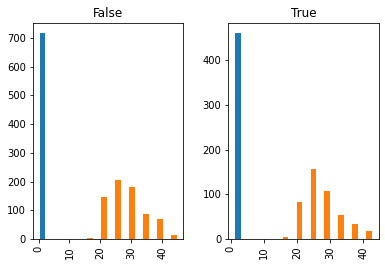

In [10]:
ma.hist(by ='Maternal Smoker')

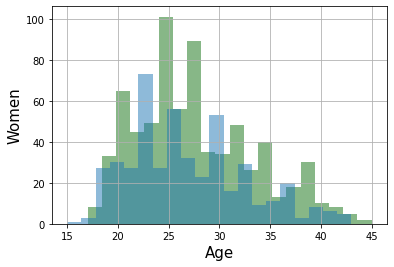

In [19]:
import seaborn as sns
nsm.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("green", .75), bins=20)
sm.hist(histtype='stepfilled', alpha=.5, bins=20) 
plt.xlabel('Age',fontsize=15)
plt.ylabel('Women',fontsize=15)
plt.show()

#Inference:
No of non smoking mothers most at ages 23-25.


#Q2
 Which statistical test would you employ?
 Ans: AB testing, since we are comparing two features of the dataset

#Q3
Null Hypothesis:
Average age of mothers who smoked is less than those who did not smoke.

Alternate Hypothesis:
Average age of mothers who smoked is greater than those who did not smoke.

#Q4
What statistic do you recommend to apply for this case?

#Q5
State the observed statistic:

In [44]:
mt = ma.groupby('Maternal Smoker').mean()
mt

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [45]:
obsdiff = mt['Maternal Age'][1] - mt['Maternal Age'][0]
obsdiff

-0.8076725017901509

#Q6
Simulate the test statistic under the Null that will help make the decision.

In [46]:
diffs = np.zeros(6000)
for i in np.arange(6000):
    ma = data[['Maternal Smoker', 'Maternal Age']]
    shuffle = ma.sample(1174,replace = False)
    shuffled = shuffle['Maternal Age']
    originshuffle = ma.assign(shuffled=shuffled.values )
    means= originshuffle.groupby('Maternal Smoker').mean()
    diff = means['shuffled'][0]- means['shuffled'][1]
    diffs[i] = diff

In [47]:
diff_df = pd.DataFrame(diffs)
diff_df

,0
0,-0.544528
1,-0.923717
2,-0.261925
3,0.439216
4,0.485720
...,...
5995,0.052873
5996,-0.197535
5997,-0.505178
5998,0.260353


#Q7
Draw a histogram to depict what the model of random selection predicts about the 
statistic.

Observed Difference: -0.8076725017901509


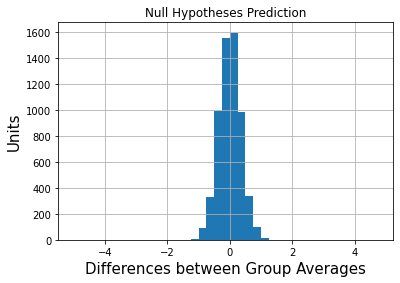

In [52]:
diff_df.hist(bins = np.arange(-5,5,0.25))
plt.title('Null Hypotheses Prediction');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', obsdiff)

#Q8
Evaluate the empirical p-value of the test.


In [51]:
np.count_nonzero(diffs <= obsdiff)/diffs.size

0.013166666666666667

#Q9
Since the Observed value of the dataset is 0.08 and the p-value of the simulation are very close we do not have the evidence to reject the null hypothesis.